## NOTE : THIS IS THE ADDITIONAL NOTEBOOK IN WHICH I HAVE PERFORMED THE DATA CLEANSING FOR THE DATA PROVIDED FOR PART 3 OF THE TASK

### DATA CLEANSING :
    ISSUE             : DATASET IS NOT LABELLED,IT IS RANDOMLY DISTRIBUTED
    POSSIBLE SOLUTION : There are many ways to label the data(k-means clustering etc.), But Here I am going to use the part-2 Pretrained Model which is trained on Mnist dataset and has the testing accuracy of 99.59%.
        

#### Importing the libraires

In [1]:
import numpy as np
import cv2 as cv
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import zipfile

## loadind the dataset

In [2]:
path = '/content/mnistTask.zip'
zip_ref = zipfile.ZipFile(path,'r')
zip_ref.extractall('tmp')
zip_ref.close()


#### Storing each image In numpy array

In [3]:
img = []
dirpath = '/content/tmp/mnistTask'


# Load in the images
for filepath in os.listdir(dirpath):
    img_path = os.path.join(dirpath,filepath)
    img.append(cv.imread(img_path,0))

img = np.asarray(img)

#### Reshaping the Images

In [4]:
img = img.reshape(img.shape[0], 28, 28, 1)
img = img.astype('float32')
img  /= 255


#### Loading the Pretrained model Trained on Mnist dataset & Predicting the label for each Image

In [5]:
path_model = '/content/Mnist_train_model_99.59 acc..h5'
model  = tf.keras.models.load_model(path_model)
predict = model.predict(img)

##### Prediction for the First image

In [6]:
predict[0]

array([5.4160534e-11, 1.1902614e-12, 1.0382111e-10, 4.3451844e-12,
       2.9796990e-10, 1.6896833e-09, 1.0000000e+00, 2.2736553e-14,
       3.1812705e-10, 8.7951391e-13], dtype=float32)

#### Converting The prediction into their Respective Class,

In [7]:
Y_train = predict.argmax(axis = 1)

### Here we got our required labels of the images

In [8]:
Y_train

array([6, 5, 3, ..., 1, 4, 3])

### Now Training Time, For Training I use the pretrained Model part -1 , And use the Clean dataset Which we have created above

In [9]:
path_model = '/content/best_model_pretrained.h5'
pretrained_model  = tf.keras.models.load_model(path_model)
pretrained_model.summary()


Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 24, 24, 64)        36928     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 12, 12, 64)        0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 12, 12, 64)        256       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 10, 10, 128)       7385

##### One hot encoding for the labels of the image

In [10]:
from keras.utils import np_utils
n_classes = 10
print("Shape before one-hot encoding: ", Y_train.shape)
Y_train = np_utils.to_categorical(Y_train, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)


#### Training

In [11]:
history1 = pretrained_model.fit(img, Y_train, batch_size= 128, epochs=50)

Epoch 1/50
469/469 [==============================] - 8s 15ms/step - loss: 0.2886 - accuracy: 0.9179
Epoch 2/50
469/469 [==============================] - 7s 14ms/step - loss: 0.0816 - accuracy: 0.9749
Epoch 3/50
469/469 [==============================] - 7s 14ms/step - loss: 0.0558 - accuracy: 0.9827
Epoch 4/50
469/469 [==============================] - 7s 15ms/step - loss: 0.0437 - accuracy: 0.9867
Epoch 5/50
469/469 [==============================] - 7s 14ms/step - loss: 0.0368 - accuracy: 0.9890
Epoch 6/50
469/469 [==============================] - 7s 14ms/step - loss: 0.0303 - accuracy: 0.9906
Epoch 7/50
469/469 [==============================] - 7s 15ms/step - loss: 0.0254 - accuracy: 0.9917
Epoch 8/50
469/469 [==============================] - 7s 15ms/step - loss: 0.0222 - accuracy: 0.9933
Epoch 9/50
469/469 [==============================] - 7s 14ms/step - loss: 0.0200 - accuracy: 0.9937
Epoch 10/50
469/469 [==============================] - 7s 15ms/step - loss: 0.0181 - accura

### plotting the Result

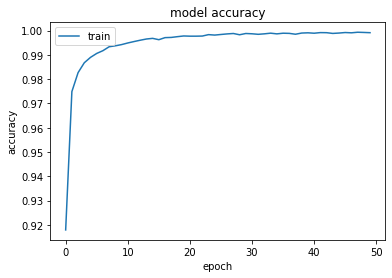

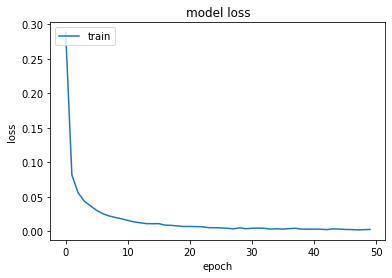

In [12]:
# summarize history for accuracy
plt.plot(history1.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history1.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

#### NOW WE HAVE TO TEST THIS MODEL ON THE MNIST TESTSET,SO I LOAD THE MNIST DATASET,AND IMPLEMENT THE ONEHOT ENCODING FOR THE Y_TEST AND THEN PREDICT THE RESULT

In [17]:
from tensorflow.keras.datasets import mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_test = X_test/255.0
Trueclasses = Y_test

In [18]:

from keras.utils import np_utils
n_classes = 10
Y_test = np_utils.to_categorical(Y_test, n_classes)


# TESTING ACCURACY : 99.59%(IT WAS NOT EVEN 0.1% IN CASE OF THE MODEL TRAINED ON PROVIDED ORIGINAL(NOISY) DATASET)

In [19]:
score = model.evaluate(X_test,Y_test)




313/313 [==============================] - 1s 4ms/step - loss: 0.0207 - accuracy: 0.9959


### CONFUSION MATRIX FOR THE PLOT

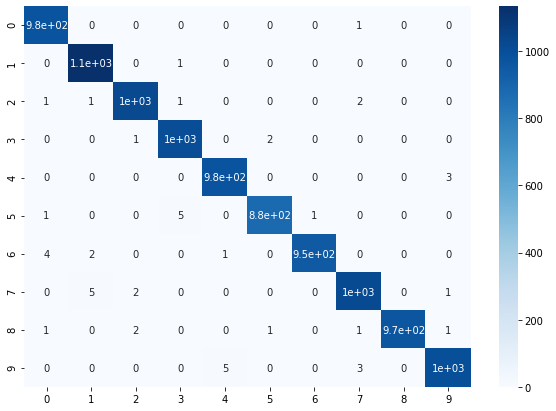

In [28]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

Predicted_class = pretrained_model.predict(X_test)

array = confusion_matrix(Trueclasses, Predicted_class.argmax(axis = 1))
df_cm = pd.DataFrame(array, index = [i for i in "0123456789"],columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True,cmap = 'Blues')



